In [1]:
import pandas as pd
import os

import scipy.stats
from scipy.stats import hypergeom
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt

%pylab inline

import numpy
#import statsmodels.stats.multitest as smm
#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import genenetic data (putative and bonefide terminal seelctors with at least one genetic markers tested)
gdata=pd.read_csv("../../data/genetic_data/011020_genetic_evidence_by_TF.csv",sep=',')

#import brain atlas data
ba=pd.read_csv("../../data/BrainAtlas/Binary Brain atlas V17_w_120619_HB_data_Jan_10_2020.csv",sep=",")


In [3]:
TS_map="ceh-36	ceh-37	ceh-17	ceh-24	lin-11	ttx-3	lim-4	lim-6	unc-42	unc-30	vab-3	unc-86	ceh-6	ceh-10	ceh-14	tab-1	ttx-1	mec-3	ceh-43	unc-3	che-1	pag-3	ets-5	ast-1	nhr-67	sox-2	sox-3	cfi-1	hlh-4	aptf-1	elt-1".split('	')
nc_counts="2	2	1	3	3	4	2	3	11	3	3	15	1	2	9	1	1	4	3	15	1	1	1	4	4	7	1	2	1	1	2".split('	')
for t in TS_map:
    if t not in gdata["TF"].values:
        print('missing',t)
    else:
        print(t, nc_counts[TS_map.index(t)], len(gdata.loc[gdata['TF']==t]["neuron_class"].values))

ceh-36 2 2
ceh-37 2 2
ceh-17 1 1
ceh-24 3 3
lin-11 3 4
ttx-3 4 4
lim-4 2 3
lim-6 3 3
unc-42 11 15
unc-30 3 4
vab-3 3 3
unc-86 15 19
ceh-6 1 1
ceh-10 2 2
ceh-14 9 12
tab-1 1 1
ttx-1 1 1
mec-3 4 6
ceh-43 3 3
unc-3 15 16
che-1 1 1
pag-3 1 2
ets-5 1 1
ast-1 4 4
nhr-67 4 2
sox-2 7 4
sox-3 1 1
cfi-1 2 4
hlh-4 1 1
aptf-1 1 1
elt-1 2 3


In [4]:
#Figure 1B
#genes to include in AIY model (only those tested in TF mutant should be listed = 17 genes)
l=gdata.loc[gdata["neuron_class"]=="AIY"]['TF dep. Activated Markers '].drop_duplicates().values[0].split(', ')
print(len(l))
sorted(l)

1


['ttx-3  ']

In [5]:
#Figure 1C
gdata=gdata.sort_values(ascending=False,by='Hobert total markers tested')
c=gdata.loc[(gdata['Hobert total markers tested']>=20) & (gdata['num of genes with bs mutated']>0) & (gdata['TF']!='ttx-3')][["neuron_class","TF","num of genes with bs mutated","Hobert TF dep marker count","Hobert TF independent marker count"]]

c["TF dep minus mutated"]=c["Hobert TF dep marker count"]-c["num of genes with bs mutated"]
c=c[["neuron_class","TF","num of genes with bs mutated","TF dep minus mutated","Hobert TF independent marker count"]]


In [6]:
c['total']=c['num of genes with bs mutated']+c['TF dep minus mutated']+c['Hobert TF independent marker count']
c['TF dep']=c['num of genes with bs mutated']+c['TF dep minus mutated']
c['prop_dep']=c['TF dep']/c['total']
c

neuron_class             TF  num of genes with bs mutated  \
88           DB          unc-3                           5.0   
89           DA          unc-3                           6.0   
90           VB          unc-3                           6.0   
55          ADL          hlh-4                           1.0   
41          ASE          che-1                           2.0   
8           AIY  ceh-10--ttx-3                          14.0   
91           VA          unc-3                           6.0   

    TF dep minus mutated  Hobert TF independent marker count  total  TF dep  \
88                  22.0                                   5   32.0    27.0   
89                  20.0                                   5   31.0    26.0   
90                  20.0                                   3   29.0    26.0   
55                  22.0                                   1   24.0    23.0   
41                  21.0                                   0   23.0    23.0   
8                    3.0                                   3   20.0    17.0   
91                  11.0                                   3   20.0    17.0   

    prop_dep  
88  0.843750  
89  0.838710  
90  0.896552  
55  0.958333  
41  1.000000  
8   0.850000  
91  0.850000

In [7]:
c=gdata.loc[(gdata['Hobert total markers tested']>=20) & (gdata['num of genes with bs mutated']>0) & (gdata['TF']!='ttx-3')][["neuron_class","TF","num of genes with bs mutated","Hobert TF dep marker count","Hobert TF independent marker count"]]

c["TF dep minus mutated"]=c["Hobert TF dep marker count"]-c["num of genes with bs mutated"]
c=c[["neuron_class","TF","num of genes with bs mutated","TF dep minus mutated","Hobert TF independent marker count"]]


/Users/lori/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


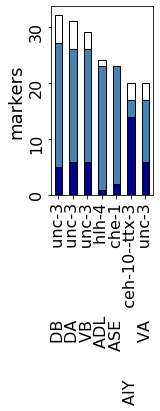

In [8]:

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize

ax=c.plot.bar(stacked=True,colors=['darkblue','steelblue','white'],edgecolor='black', rot=90,legend=False,figsize=(2.5,6))
xlabels=list(c[['neuron_class','TF']].values)
xlabels=['%s\t\t%s'.expandtabs() %(i[0],i[1]) for i in xlabels]
ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("markers")
plt.tight_layout()
plt.savefig('../../output/figure_parts/Fig1C_TS_evidence_barchart.pdf')
plt.show()


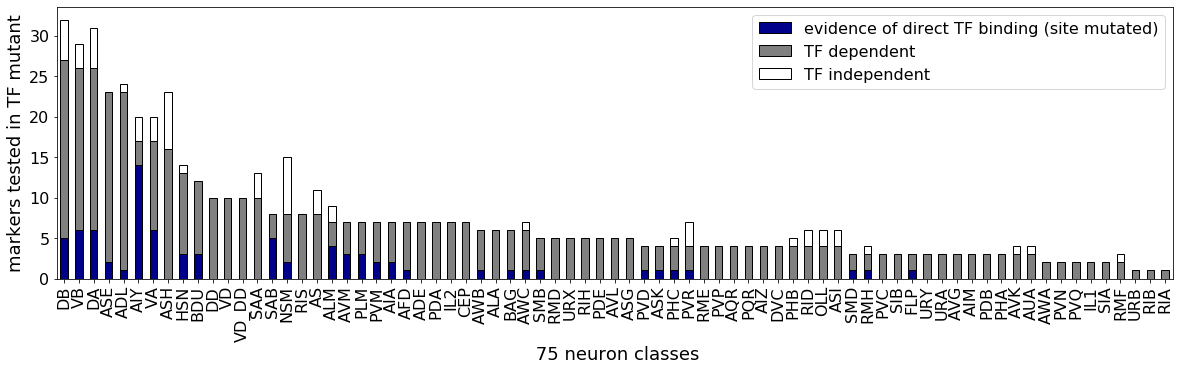

In [9]:
#figure 1D
#get list of putative terminal selectors from gdata (TF-dep>TF indep.)
cols=['TF', 'neuron_class','Hobert TF dep marker count', 'TF indep count','Hobert total markers tested','num of genes with bs mutated']
d=gdata.loc[gdata['Hobert TF independent marker count']<gdata['Hobert TF dep marker count']].drop_duplicates()
#d['TF dep minus mutated']=d['Hobert TF dep marker count']-d['num of genes with bs mutated']
d=d.sort_values(ascending=[False,False,True],by=['Hobert TF dep marker count','num of genes with bs mutated','Hobert TF independent marker count'])

df=pd.DataFrame()
headers=['neuron_class','evidence of direct TF binding (site mutated)', 'TF dependent', 'TF independent']
for neuron_class in list(d["neuron_class"].drop_duplicates().values):
    n=d.loc[d["neuron_class"]==neuron_class]
    max_markers=max(list(n['Hobert total markers tested'].values))
    tf_dep=max(list(n['Hobert TF dep marker count'].values))
    tf_indep=max_markers-tf_dep
    mutated=max(list(n['num of genes with bs mutated'].values))
    results=[neuron_class,mutated,tf_dep-mutated,tf_indep]
    #print(r)
    dictionary = dict(zip(headers, results))
    df=df.append(dictionary,ignore_index=True)
    

plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize

ax=df[headers].plot.bar(stacked=True,figsize=(20,5),color=['darkblue','grey','white'],edgecolor='black')
xlabels=list(df['neuron_class'].values)
plt.ylabel("markers tested in TF mutant")
plt.xlabel(" %s neuron classes" %(len(df)))
ax.set_xticklabels(xlabels, rotation=90)
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.savefig("../../output/figure_parts/Fig1D_genetic_evidence_by_neuron_class_barchart.pdf")
plt.show()


In [10]:
#Fig1D which neuron classes to color black (no putative terminal selector)
all_neuron_classes=set(list((ba["class"].drop_duplicates().values)))
putative_TS=set(list(df["neuron_class"].drop_duplicates().values))
no_TS=sorted(list(all_neuron_classes-putative_TS))
putative_TS =sorted(list(putative_TS))

TS=sorted(list(c["neuron_class"].values))
print('#color these blue: ', len(TS))
print('TS=',TS)
print('\n')

noTS=sorted(list(no_TS))
print('#color these black: ',len(noTS))
print('noTS=',noTS)
print('\n')

print('#color these grey: ', len(putative_TS))
print('putative_TS=', putative_TS)
print('\n')

#color these blue:  7
TS= ['ADL', 'AIY', 'ASE', 'DA', 'DB', 'VA', 'VB']


#color these black:  44
noTS= ['ADA', 'ADF', 'AIB', 'AIN', 'ALN', 'ASJ', 'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVJ', 'CAN', 'DVA', 'DVB', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'LUA', 'M1', 'M2', 'M3', 'M4', 'M5', 'MC', 'MI', 'OLQ', 'PLN', 'PVT', 'PVW', 'RIC', 'RIF', 'RIG', 'RIM', 'RIP', 'RIR', 'RIV', 'RMG', 'SDQ', 'VC']


#color these grey:  75
putative_TS= ['ADE', 'ADL', 'AFD', 'AIA', 'AIM', 'AIY', 'AIZ', 'ALA', 'ALM', 'AQR', 'AS', 'ASE', 'ASG', 'ASH', 'ASI', 'ASK', 'AUA', 'AVG', 'AVK', 'AVL', 'AVM', 'AWA', 'AWB', 'AWC', 'BAG', 'BDU', 'CEP', 'DA', 'DB', 'DD', 'DVC', 'FLP', 'HSN', 'IL1', 'IL2', 'NSM', 'OLL', 'PDA', 'PDB', 'PDE', 'PHA', 'PHB', 'PHC', 'PLM', 'PQR', 'PVC', 'PVD', 'PVM', 'PVN', 'PVP', 'PVQ', 'PVR', 'RIA', 'RIB', 'RID', 'RIH', 'RIS', 'RMD', 'RME', 'RMF', 'RMH', 'SAA', 'SAB', 'SIA', 'SIB', 'SMB', 'SMD', 'URA', 'URB', 'URX', 'URY', 'VA', 'VB', 'VD', 'VD_DD']




In [11]:
d.to_csv("../../data/genetic_data/071420_genetic_data_TFdep_gt_TF_indep.csv",sep=',')